In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
data = pd.read_csv('anxiety_depression_data.csv')
data.head()

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,NaN,0,1,NaN,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,NaN,1,0,NaN,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,NaN,0,1,NaN,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,NaN,0,0,NaN,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,NaN,1,1,Frequent,8,9,5,7,7


In [55]:
data.shape

(1200, 21)

In [56]:
data.shape[0]

1200

In [57]:
data.shape[1]

21

In [58]:
data.isnull().sum()

Age                                0
Gender                             0
Education_Level                    0
Employment_Status                  0
Sleep_Hours                        0
Physical_Activity_Hrs              0
Social_Support_Score               0
Anxiety_Score                      0
Depression_Score                   0
Stress_Level                       0
Family_History_Mental_Illness      0
Chronic_Illnesses                  0
Medication_Use                   747
Therapy                            0
Meditation                         0
Substance_Use                    834
Financial_Stress                   0
Work_Stress                        0
Self_Esteem_Score                  0
Life_Satisfaction_Score            0
Loneliness_Score                   0
dtype: int64

In [59]:
data.Medication_Use.value_counts()

Medication_Use
Regular       238
Occasional    215
Name: count, dtype: int64

In [60]:
data.Substance_Use.value_counts()

Substance_Use
Occasional    242
Frequent      124
Name: count, dtype: int64

In [61]:
data['Medication_Use'] = data.Medication_Use.fillna('Unknown')
data['Substance_Use'] = data.Substance_Use.fillna('Unkwon')

In [62]:
data.Medication_Use.value_counts()

Medication_Use
Unknown       747
Regular       238
Occasional    215
Name: count, dtype: int64

In [63]:
data.Substance_Use.value_counts()

Substance_Use
Unkwon        834
Occasional    242
Frequent      124
Name: count, dtype: int64

In [64]:
data.isnull().sum()

Age                              0
Gender                           0
Education_Level                  0
Employment_Status                0
Sleep_Hours                      0
Physical_Activity_Hrs            0
Social_Support_Score             0
Anxiety_Score                    0
Depression_Score                 0
Stress_Level                     0
Family_History_Mental_Illness    0
Chronic_Illnesses                0
Medication_Use                   0
Therapy                          0
Meditation                       0
Substance_Use                    0
Financial_Stress                 0
Work_Stress                      0
Self_Esteem_Score                0
Life_Satisfaction_Score          0
Loneliness_Score                 0
dtype: int64

In [65]:
data.head(5)

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Chronic_Illnesses,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,0,Unknown,0,1,Unkwon,4,3,7,5,1
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,0,Unknown,1,0,Unkwon,1,4,7,4,6
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,0,Unknown,0,1,Unkwon,8,7,8,1,1
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,1,Unknown,0,0,Unkwon,7,4,8,4,4
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,0,Unknown,1,1,Frequent,8,9,5,7,7


C:\Users\HP\AppData\Local\Temp\ipykernel_6344\355981560.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_depress = data.groupby("Age_Group")['Depression_Score'].mean().sort_values(ascending=False)


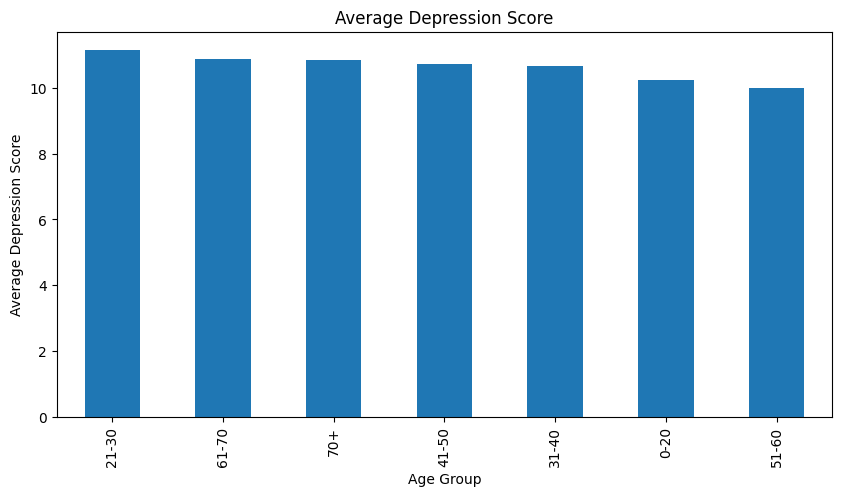

In [66]:
bins = [0, 20, 30, 40, 50, 60, 70, 120]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+']

data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True)

age_depress = data.groupby("Age_Group")['Depression_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
age_depress.plot(kind='bar')
plt.title('Average Depression Score')
plt.xlabel('Age Group')
plt.ylabel('Average Depression Score')
plt.show()

In [67]:
data.Gender.unique()

array(['Male', 'Female', 'Non-Binary', 'Other'], dtype=object)

In [68]:
data.Gender.value_counts()

Gender
Female        569
Male          520
Non-Binary     90
Other          21
Name: count, dtype: int64

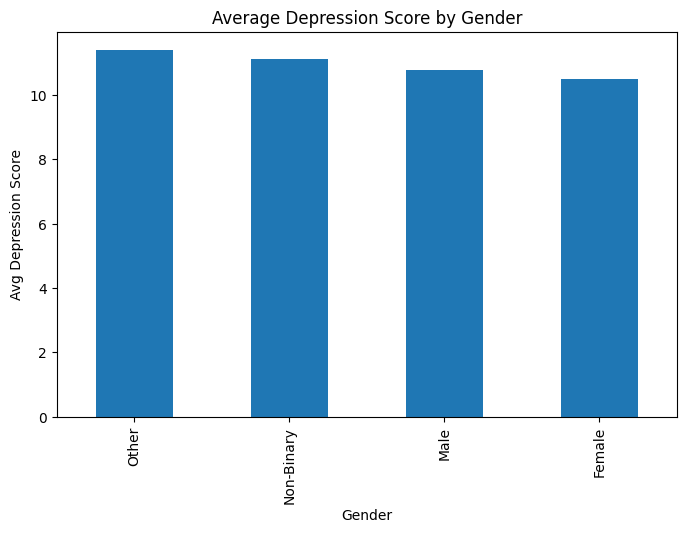

In [69]:
gender_depress = data.groupby('Gender')['Depression_Score'].mean().sort_values(ascending=False)


plt.figure(figsize=(8,5))
gender_depress.plot(kind='bar')
plt.title('Average Depression Score by Gender')
plt.xlabel('Gender')
plt.ylabel('Avg Depression Score')
plt.show()

In [70]:
data.head(5)

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,...,Medication_Use,Therapy,Meditation,Substance_Use,Financial_Stress,Work_Stress,Self_Esteem_Score,Life_Satisfaction_Score,Loneliness_Score,Age_Group
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,...,Unknown,0,1,Unkwon,4,3,7,5,1,51-60
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,...,Unknown,1,0,Unkwon,1,4,7,4,6,61-70
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,...,Unknown,0,1,Unkwon,8,7,8,1,1,41-50
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,...,Unknown,0,0,Unkwon,7,4,8,4,4,31-40
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,...,Unknown,1,1,Frequent,8,9,5,7,7,51-60


In [71]:
data.Education_Level.value_counts()

Education_Level
PhD            262
High School    242
Master's       242
Other          240
Bachelor's     214
Name: count, dtype: int64

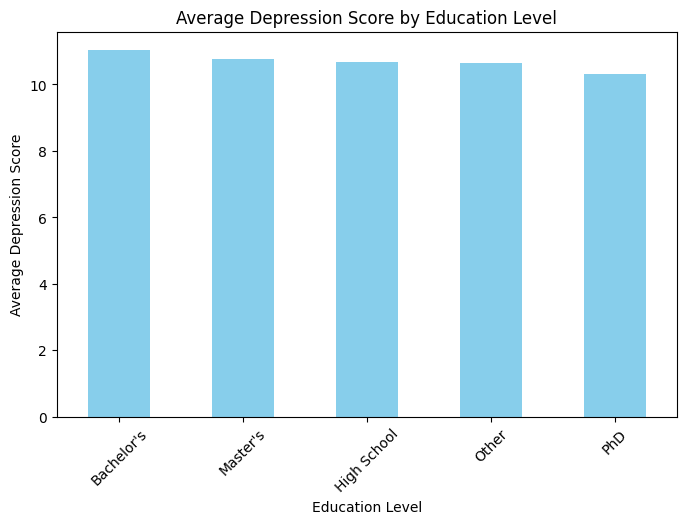

In [72]:
edu_dep = data.groupby('Education_Level').Depression_Score.mean().sort_values(ascending=False)


plt.figure(figsize=(8,5))
edu_dep.plot(kind='bar', color='skyblue')
plt.title('Average Depression Score by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Depression Score')
plt.xticks(rotation=45)
plt.show()

In [73]:
data.Employment_Status.value_counts()

Employment_Status
Employed      320
Student       310
Unemployed    288
Retired       282
Name: count, dtype: int64

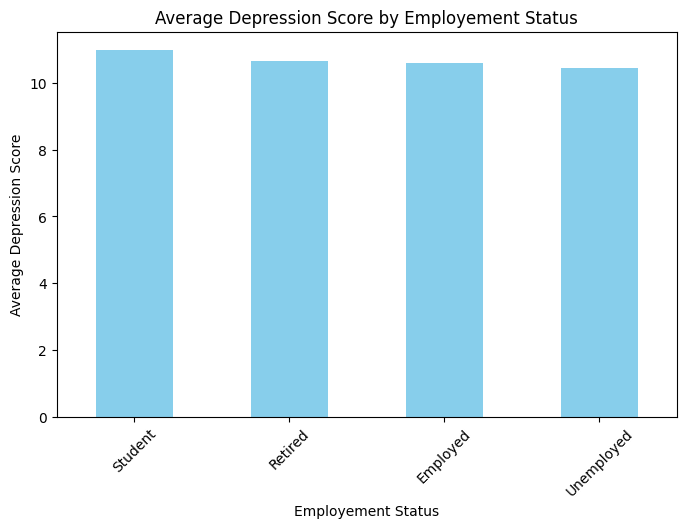

In [74]:
emp_sta = data.groupby('Employment_Status').Depression_Score.mean().sort_values(ascending=False)


plt.figure(figsize=(8,5))
emp_sta.plot(kind='bar', color='skyblue')
plt.title('Average Depression Score by Employement Status')
plt.xlabel('Employement Status')
plt.ylabel('Average Depression Score')
plt.xticks(rotation=45)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6344\1894134588.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_dep = data.groupby('Sleep_Hours_Bin')['Depression_Score'].mean().sort_values(ascending=False)


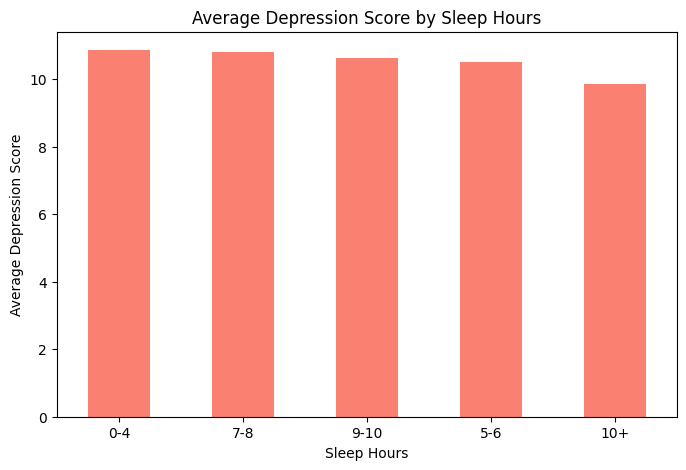

In [75]:
bins = [0, 4, 6, 8, 10, 24]
labels = ['0-4','5-6','7-8','9-10','10+']


data['Sleep_Hours_Bin'] = pd.cut(data['Sleep_Hours'], bins=bins, labels=labels, right=True)


sleep_dep = data.groupby('Sleep_Hours_Bin')['Depression_Score'].mean().sort_values(ascending=False)


plt.figure(figsize=(8,5))
sleep_dep.plot(kind='bar', color='salmon')
plt.title('Average Depression Score by Sleep Hours')
plt.xlabel('Sleep Hours')
plt.ylabel('Average Depression Score')
plt.xticks(rotation=0)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6344\3086017420.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_dep = data.groupby('Physical_Activity_Bin')['Depression_Score'].mean().sort_values(ascending=False)


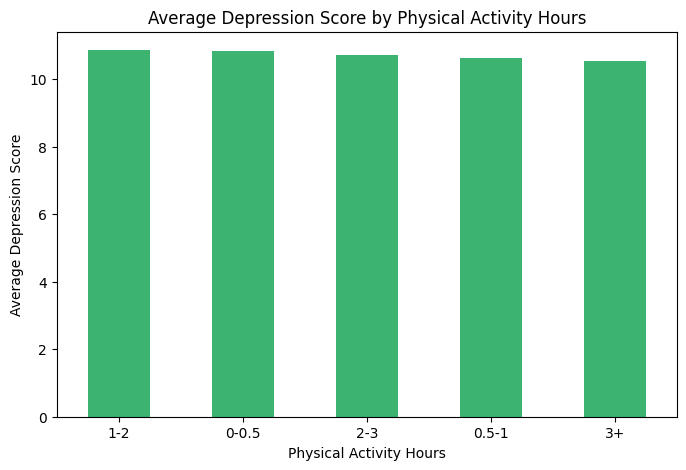

In [76]:
bins = [0, 0.5, 1, 2, 3, 24]  
labels = ['0-0.5', '0.5-1', '1-2', '2-3', '3+']


data['Physical_Activity_Bin'] = pd.cut(data['Physical_Activity_Hrs'], bins=bins, labels=labels, right=True)


activity_dep = data.groupby('Physical_Activity_Bin')['Depression_Score'].mean().sort_values(ascending=False)


plt.figure(figsize=(8,5))
activity_dep.plot(kind='bar', color='mediumseagreen')
plt.title('Average Depression Score by Physical Activity Hours')
plt.xlabel('Physical Activity Hours')
plt.ylabel('Average Depression Score')
plt.xticks(rotation=0)
plt.show()

In [77]:
data.Social_Support_Score.value_counts()

Social_Support_Score
9    149
1    145
7    143
6    136
2    135
8    134
4    129
3    120
5    109
Name: count, dtype: int64

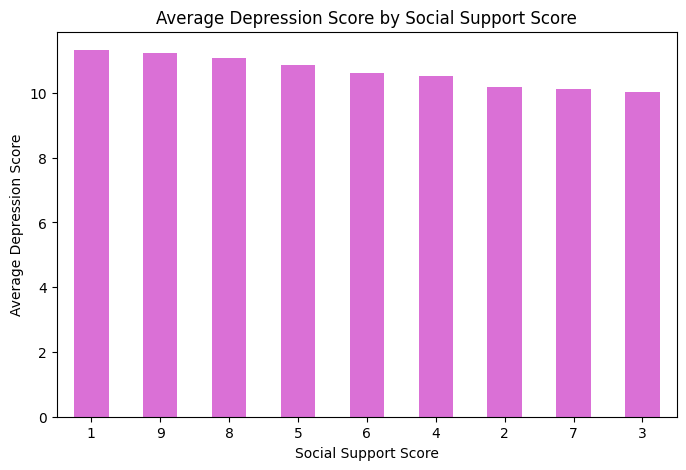

In [78]:
social_dep = data.groupby('Social_Support_Score')['Depression_Score'].mean().sort_values(ascending=False)


plt.figure(figsize=(8,5))
social_dep.plot(kind='bar', color='orchid')
plt.title('Average Depression Score by Social Support Score')
plt.xlabel('Social Support Score')
plt.ylabel('Average Depression Score')
plt.xticks(rotation=0)
plt.show()

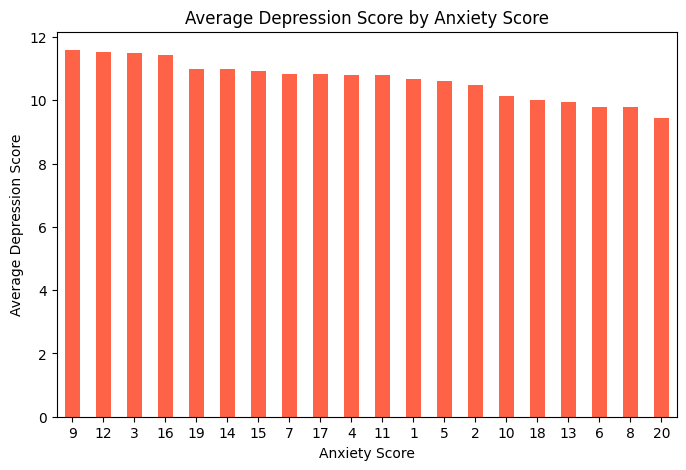

In [79]:
anxiety_dep = data.groupby('Anxiety_Score')['Depression_Score'].mean().sort_values(ascending=False)


plt.figure(figsize=(8,5))
anxiety_dep.plot(kind='bar', color='tomato')
plt.title('Average Depression Score by Anxiety Score')
plt.xlabel('Anxiety Score')
plt.ylabel('Average Depression Score')
plt.xticks(rotation=0)
plt.show()

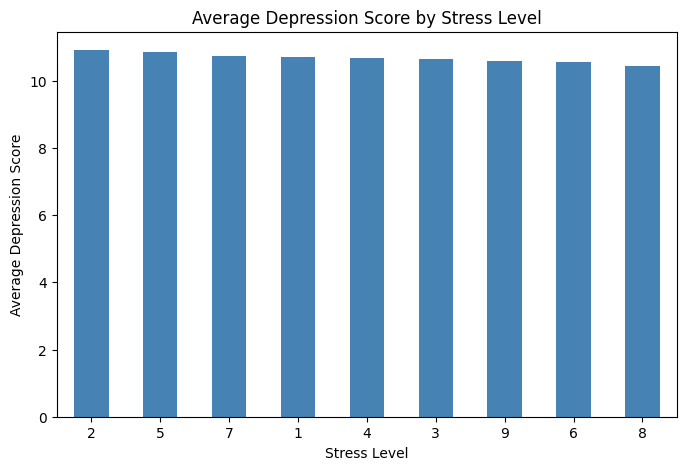

In [80]:
stress_dep = data.groupby('Stress_Level')['Depression_Score'].mean().sort_values(ascending=False)


plt.figure(figsize=(8,5))
stress_dep.plot(kind='bar', color='steelblue')
plt.title('Average Depression Score by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Average Depression Score')
plt.xticks(rotation=0)
plt.show()

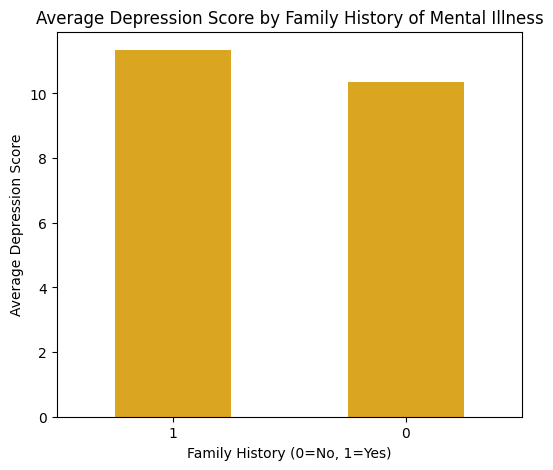

In [81]:
family_dep = data.groupby('Family_History_Mental_Illness')['Depression_Score'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(6,5))
family_dep.plot(kind='bar', color='goldenrod')
plt.title('Average Depression Score by Family History of Mental Illness')
plt.xlabel('Family History (0=No, 1=Yes)')
plt.ylabel('Average Depression Score')
plt.xticks(rotation=0)
plt.show()

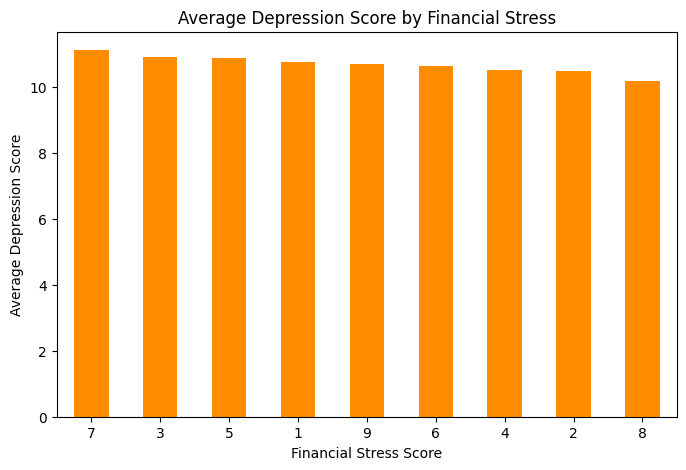

In [82]:
financial_dep = data.groupby('Financial_Stress')['Depression_Score'].mean().sort_values(ascending=False)


plt.figure(figsize=(8,5))
financial_dep.plot(kind='bar', color='darkorange')
plt.title('Average Depression Score by Financial Stress')
plt.xlabel('Financial Stress Score')
plt.ylabel('Average Depression Score')
plt.xticks(rotation=0)
plt.show()

In [83]:
columns_to_keep = [
    'Age', 
    'Gender', 
    'Education_Level', 
    'Employment_Status', 
    'Sleep_Hours', 
    'Physical_Activity_Hrs',
    'Social_Support_Score',
    'Anxiety_Score',
    'Depression_Score',
    'Stress_Level',
    'Family_History_Mental_Illness',
    'Financial_Stress'
]


data = data[columns_to_keep]


data

,Age,Gender,Education_Level,Employment_Status,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Financial_Stress
0,56,Male,Bachelor's,Unemployed,6.0,0.4,3,4,2,9,0,4
1,69,Female,Bachelor's,Retired,8.8,2.8,6,18,7,6,0,1
2,46,Female,Master's,Employed,5.3,1.6,5,5,13,8,0,8
3,32,Female,High School,Unemployed,8.8,0.5,4,6,3,4,1,7
4,60,Female,Bachelor's,Retired,7.2,0.7,2,7,15,3,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,23,Female,Other,Student,5.1,0.1,7,16,15,5,1,2
1196,43,Female,Master's,Employed,8.9,0.4,9,19,4,9,0,8
1197,71,Female,PhD,Retired,6.0,0.1,2,15,4,2,0,2
1198,21,Male,Other,Employed,8.5,2.7,8,12,20,2,1,8


In [84]:
categorical_cols = ['Gender', 'Education_Level', 'Employment_Status']

data_encoded = pd.get_dummies(data,columns=categorical_cols,drop_first=True)

In [85]:
data_encoded

,Age,Sleep_Hours,Physical_Activity_Hrs,Social_Support_Score,Anxiety_Score,Depression_Score,Stress_Level,Family_History_Mental_Illness,Financial_Stress,Gender_Male,Gender_Non-Binary,Gender_Other,Education_Level_High School,Education_Level_Master's,Education_Level_Other,Education_Level_PhD,Employment_Status_Retired,Employment_Status_Student,Employment_Status_Unemployed
0,56,6.0,0.4,3,4,2,9,0,4,True,False,False,False,False,False,False,False,False,True
1,69,8.8,2.8,6,18,7,6,0,1,False,False,False,False,False,False,False,True,False,False
2,46,5.3,1.6,5,5,13,8,0,8,False,False,False,False,True,False,False,False,False,False
3,32,8.8,0.5,4,6,3,4,1,7,False,False,False,True,False,False,False,False,False,True
4,60,7.2,0.7,2,7,15,3,0,8,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,23,5.1,0.1,7,16,15,5,1,2,False,False,False,False,False,True,False,False,True,False
1196,43,8.9,0.4,9,19,4,9,0,8,False,False,False,False,True,False,False,False,False,False
1197,71,6.0,0.1,2,15,4,2,0,2,False,False,False,False,False,False,True,True,False,False
1198,21,8.5,2.7,8,12,20,2,1,8,True,False,False,False,False,True,False,False,False,False


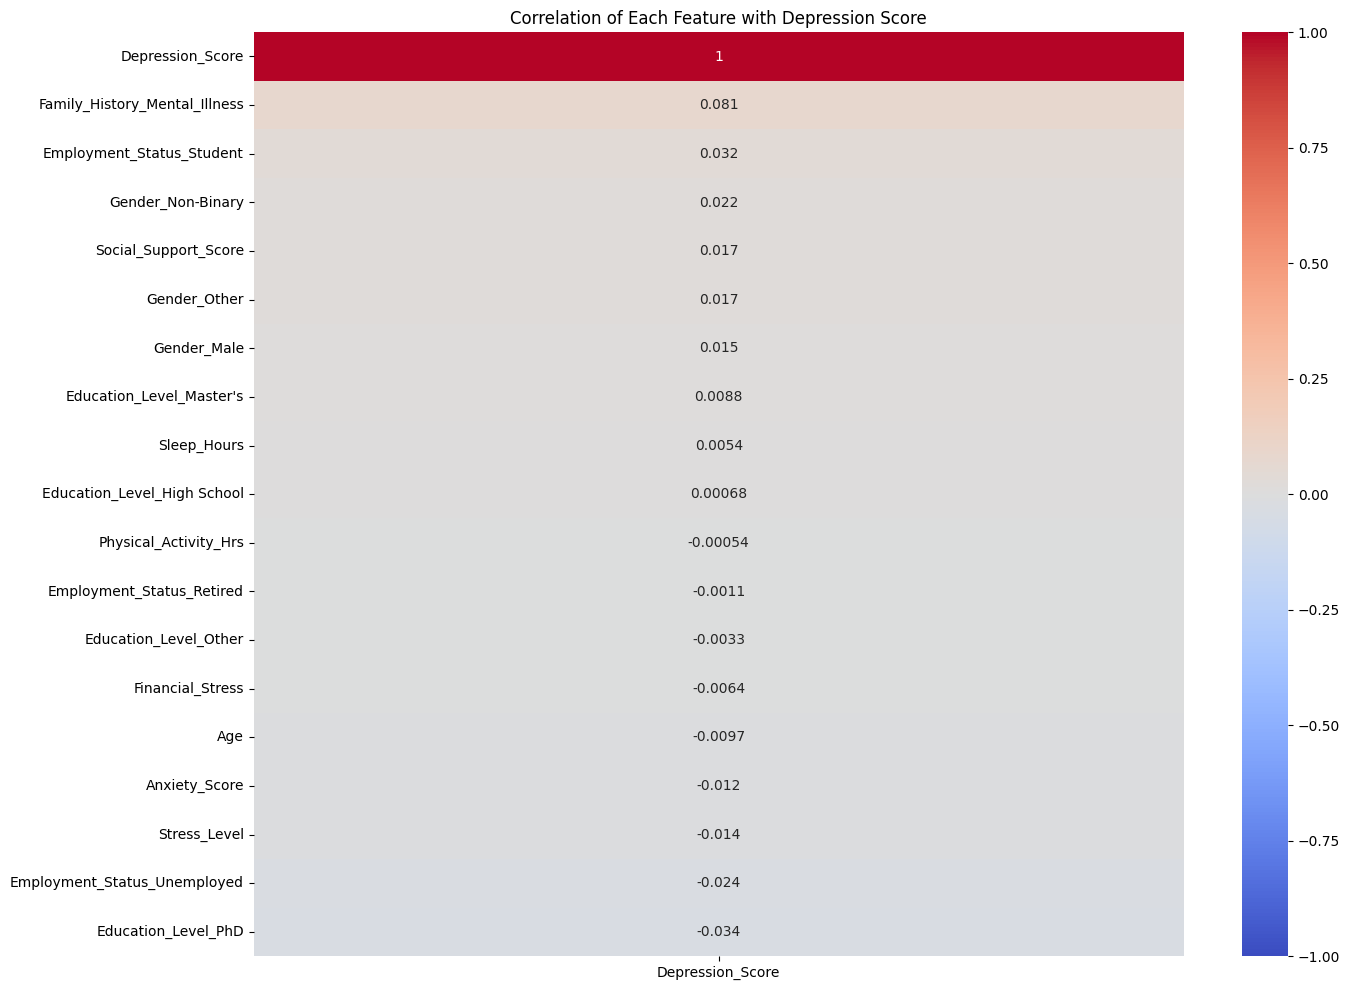

In [86]:
corr_matrix = data_encoded.corr()

plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix[['Depression_Score']].sort_values(by='Depression_Score',ascending=False),
            annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.title('Correlation of Each Feature with Depression Score')
plt.show()

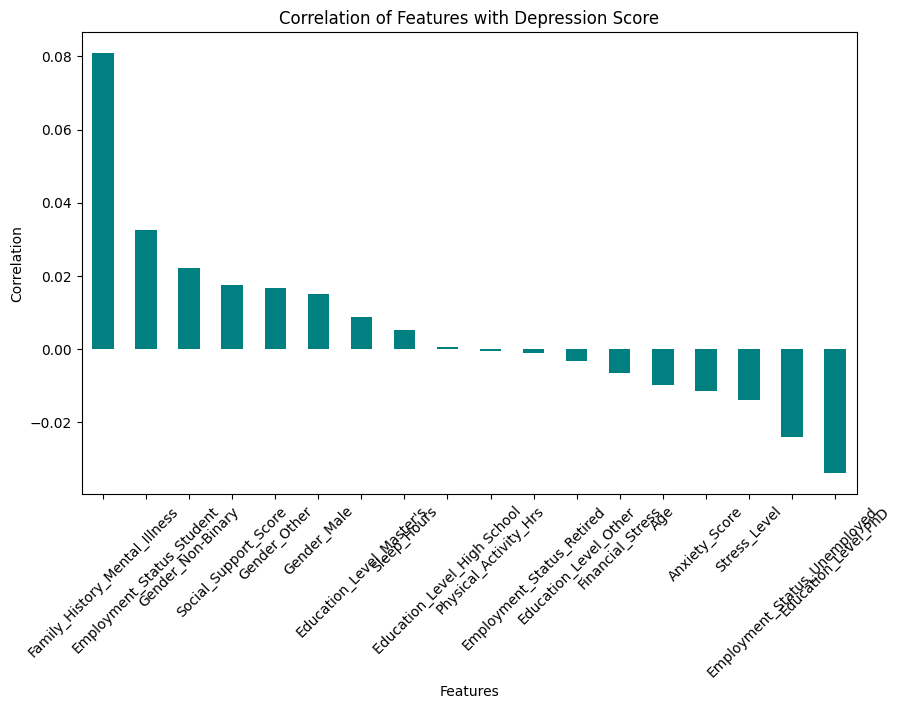

In [87]:
correlations = data_encoded.corr()['Depression_Score'].sort_values(ascending=False)

# Plot as bar chart
plt.figure(figsize=(10,6))
correlations.drop('Depression_Score').plot(kind='bar', color='teal')
plt.title('Correlation of Features with Depression Score')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

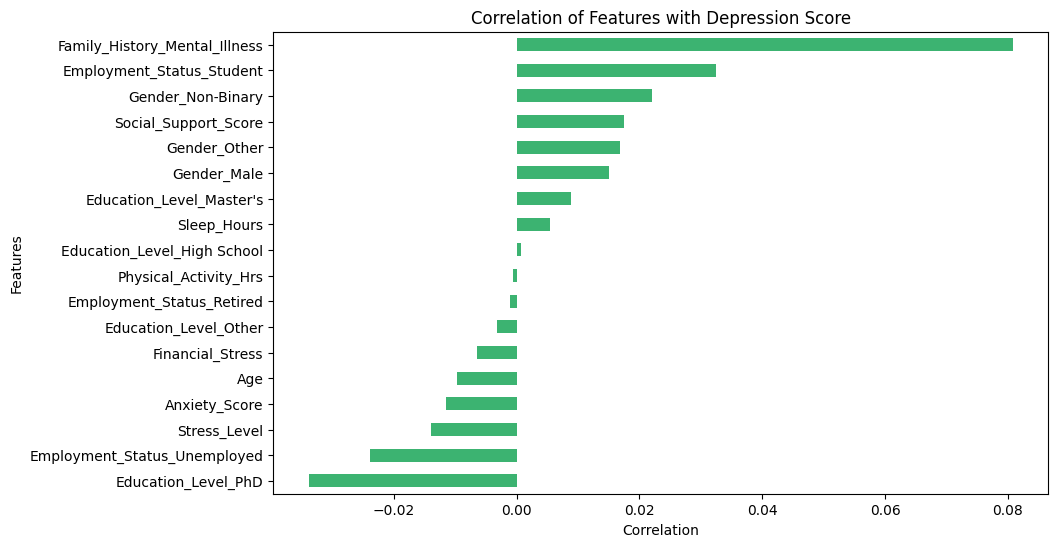

In [88]:
correlations = data_encoded.corr()['Depression_Score'].drop('Depression_Score').sort_values(ascending=False)


plt.figure(figsize=(10,6))
correlations.plot(kind='barh', color='mediumseagreen')
plt.title('Correlation of Features with Depression Score')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.gca().invert_yaxis() 
plt.show()

In [89]:

max_dep = data['Depression_Score'].max()
min_dep = data['Depression_Score'].min()
mean_dep = data['Depression_Score'].mean()

print(f"Minimum Depression Score: {min_dep}")
print(f"Maximum Depression Score: {max_dep}")
print(f"Mean Depression Score: {mean_dep}")


print("\nCounts of each Depression Score:")
print(data['Depression_Score'].value_counts().sort_index())


Minimum Depression Score: 1
Maximum Depression Score: 20
Mean Depression Score: 10.674166666666666

Counts of each Depression Score:
Depression_Score
1     56
2     52
3     54
4     51
5     64
6     58
7     59
8     68
9     56
10    62
11    45
12    83
13    74
14    58
15    67
16    67
17    55
18    50
19    63
20    58
Name: count, dtype: int64


In [90]:
data_encoded['Depressed'] = (data['Depression_Score'] >= 11).astype(int)


data_encoded = data_encoded.drop('Depression_Score', axis=1)

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_encoded.drop('Depressed',axis=1)
y = data_encoded['Depressed']



numeric_cols = [
    'Age', 'Sleep_Hours', 'Physical_Activity_Hrs',
    'Social_Support_Score', 'Anxiety_Score',
    'Stress_Level', 'Family_History_Mental_Illness',
    'Chronic_Illnesses', 'Financial_Stress', 'Work_Stress',
    'Self_Esteem_Score', 'Life_Satisfaction_Score', 'Loneliness_Score'
]

numeric_cols_existing = [col for col in numeric_cols if col in X.columns]
scaler = StandardScaler()


X_scaled = X.copy()


X_scaled[numeric_cols_existing] = scaler.fit_transform(X[numeric_cols_existing])


X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100,random_state=42)

rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [93]:
y_pred = rf_model.predict(X_test)

In [94]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

accuracy_score(y_test, y_pred)

0.55


Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.47      0.52       125
           1       0.53      0.63      0.57       115

    accuracy                           0.55       240
   macro avg       0.55      0.55      0.55       240
weighted avg       0.56      0.55      0.55       240



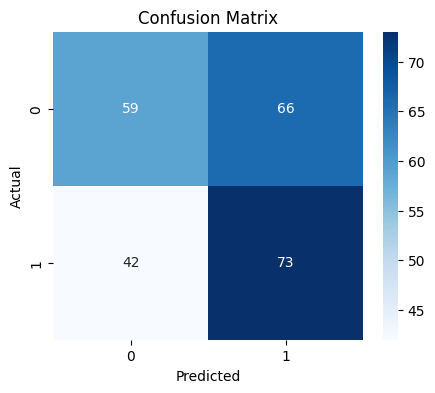

In [95]:

print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [96]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=2
)


Epoch 1/100
24/24 - 1s - 33ms/step - accuracy: 0.5013 - loss: 0.7335 - val_accuracy: 0.5417 - val_loss: 0.7018
Epoch 2/100
24/24 - 0s - 3ms/step - accuracy: 0.5482 - loss: 0.6978 - val_accuracy: 0.5625 - val_loss: 0.6970
Epoch 3/100
24/24 - 0s - 5ms/step - accuracy: 0.5430 - loss: 0.6972 - val_accuracy: 0.5312 - val_loss: 0.6976
Epoch 4/100
24/24 - 0s - 4ms/step - accuracy: 0.5651 - loss: 0.6878 - val_accuracy: 0.5052 - val_loss: 0.6976
Epoch 5/100
24/24 - 0s - 3ms/step - accuracy: 0.5664 - loss: 0.6883 - val_accuracy: 0.5208 - val_loss: 0.6946
Epoch 6/100
24/24 - 0s - 3ms/step - accuracy: 0.5352 - loss: 0.6908 - val_accuracy: 0.4948 - val_loss: 0.6971
Epoch 7/100
24/24 - 0s - 3ms/step - accuracy: 0.5547 - loss: 0.6777 - val_accuracy: 0.5000 - val_loss: 0.6974
Epoch 8/100
24/24 - 0s - 3ms/step - accuracy: 0.5521 - loss: 0.6791 - val_accuracy: 0.4896 - val_loss: 0.6975
Epoch 9/100
24/24 - 0s - 4ms/step - accuracy: 0.5534 - loss: 0.6771 - val_accuracy: 0.4792 - val_loss: 0.6993
Epoch 10/

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Test Accuracy: 0.5291666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.50      0.53       125
           1       0.51      0.56      0.53       115

    accuracy                           0.53       240
   macro avg       0.53      0.53      0.53       240
weighted avg       0.53      0.53      0.53       240



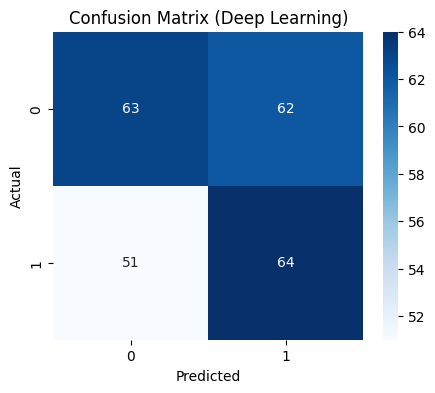

In [100]:

y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob >= 0.5).astype(int)

print("Test Accuracy:", accuracy_score(y_test, y_pred))


print("\nClassification Report:\n", classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Deep Learning)')
plt.show()


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))  


model.compile(optimizer='adam', loss='mse', metrics=['mae'])


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=2
)


Epoch 1/100
24/24 - 1s - 33ms/step - loss: 0.4757 - mae: 0.5714 - val_loss: 0.3330 - val_mae: 0.5296
Epoch 2/100
24/24 - 0s - 4ms/step - loss: 0.4097 - mae: 0.5559 - val_loss: 0.3025 - val_mae: 0.5177
Epoch 3/100
24/24 - 0s - 3ms/step - loss: 0.3660 - mae: 0.5290 - val_loss: 0.2889 - val_mae: 0.5133
Epoch 4/100
24/24 - 0s - 3ms/step - loss: 0.3143 - mae: 0.4980 - val_loss: 0.2806 - val_mae: 0.5100
Epoch 5/100
24/24 - 0s - 3ms/step - loss: 0.2962 - mae: 0.4886 - val_loss: 0.2772 - val_mae: 0.5070
Epoch 6/100
24/24 - 0s - 3ms/step - loss: 0.3098 - mae: 0.4994 - val_loss: 0.2713 - val_mae: 0.5022
Epoch 7/100
24/24 - 0s - 3ms/step - loss: 0.2865 - mae: 0.4915 - val_loss: 0.2669 - val_mae: 0.5005
Epoch 8/100
24/24 - 0s - 3ms/step - loss: 0.2848 - mae: 0.4891 - val_loss: 0.2650 - val_mae: 0.4994
Epoch 9/100
24/24 - 0s - 3ms/step - loss: 0.2826 - mae: 0.4908 - val_loss: 0.2668 - val_mae: 0.4998
Epoch 10/100
24/24 - 0s - 4ms/step - loss: 0.2665 - mae: 0.4754 - val_loss: 0.2639 - val_mae: 0.499

In [103]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test_scaled).flatten()


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE:", mse)
print("Test R2 Score:", r2)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Test MSE: 0.27566662430763245
Test R2 Score: -0.10458409786224365


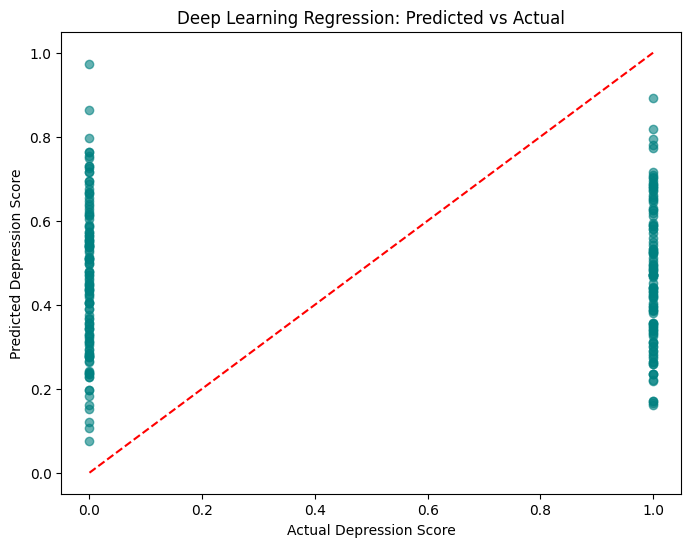

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Depression Score")
plt.ylabel("Predicted Depression Score")
plt.title("Deep Learning Regression: Predicted vs Actual")
plt.show()


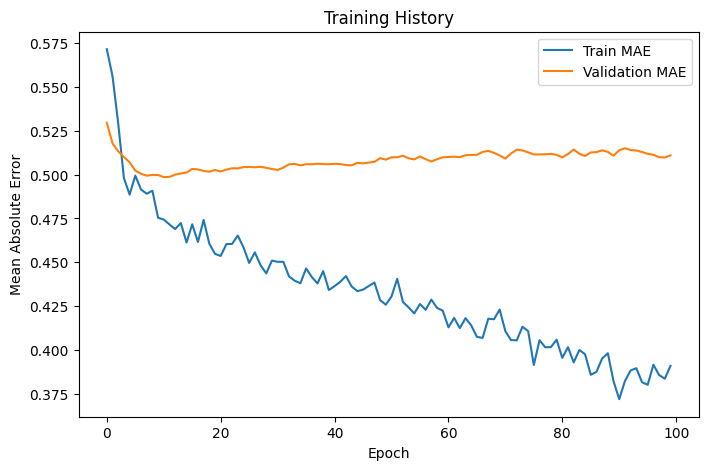

In [105]:
plt.figure(figsize=(8,5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training History')
plt.legend()
plt.show()
